In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Data Understanding

- track_id: ID Spotify trek  
- artists: Nama artis yang membawakan, dipisahkan ; jika lebih dari satu  
- album_name: Nama album  
- track_name: Nama trek  
- popularity: Popularitas dari 0-100, berdasarkan jumlah putaran dan terbaru  
- duration_ms: Durasi trek dalam milidetik  
- explicit: Ada lirik eksplisit (true/false)  
- danceability: Kemampuan untuk menari (0.0-1.0)  
- energy: Tingkat energi (0.0-1.0)  
- key: Kunci nada (0-11, -1 jika tidak terdeteksi)  
- loudness: Kekerasan dalam dB  
- mode: Mode mayor (1) atau minor (0)  
- speechiness: Kemiripan dengan ucapan (0.0-1.0)  
- acousticness: Keaslian akustik (0.0-1.0)  
- instrumentalness: Tanpa vokal (0.0-1.0)  
- liveness: Kemungkinan live (0.0-1.0)  
- valence: Positivitas musik (0.0-1.0)  
- tempo: Tempo dalam BPM  
- time_signature: Tanda birama (3-7)  
- track_genre: Genre musiknya

In [2]:
data = pd.read_csv('data/spotify_dataset.csv')
data.sample(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
3917,3917,650OeHTLxZAQmb4aEbGmaA,Linkin Park;Pusha T;Stormzy,One More Light,Good Goodbye (feat. Pusha T and Stormzy),63,211413,False,0.697,0.840,...,-4.602,0,0.0540,0.106000,0.000000,0.7480,0.452,128.034,4,alternative
105208,105208,6pPdSiA17dUM773DCRFhUx,Jobii,Sheep Rotation,Scootaloo,38,147110,False,0.731,0.424,...,-6.664,0,0.2590,0.360000,0.000834,0.1900,0.604,84.995,4,study
50875,50875,5tALWqLxD1uD2bYOb2qjiN,Almafuerte;Beto Zamarbide,En Vivo All Boys,Muy Cansado Estoy - En Vivo All Boys,21,114528,False,0.210,0.937,...,-6.216,1,0.0567,0.003530,0.000044,0.6830,0.308,144.812,4,heavy-metal
52109,52109,4QV1hnN4YCsjhmemeNFkjk,Hank Williams;Drifting Cowboys,40 Greatest Hits,Half As Much,18,164466,False,0.669,0.192,...,-15.831,1,0.0367,0.977000,0.000031,0.0946,0.393,127.173,4,honky-tonk
71489,71489,0yH7RR6CPpidfHe6KD15WV,Oficina G3,Depois da Guerra,Meus Próprios Meios,45,292478,False,0.490,0.967,...,-3.680,0,0.0850,0.000863,0.000004,0.0901,0.374,159.998,4,metal


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [5]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['popularity', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [6]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


## Duplicate

In [7]:
# Check duplicates
data.duplicated().sum()

np.int64(450)

In [8]:
data['track_id'].duplicated().sum()

np.int64(24259)

In [9]:
data['track_id'].nunique()

89741

In [ ]:
data['track_name'].duplicated().sum()

np.int64(40391)

## Missing Value

In [ ]:
# Check for missing values
data.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

## Outliers

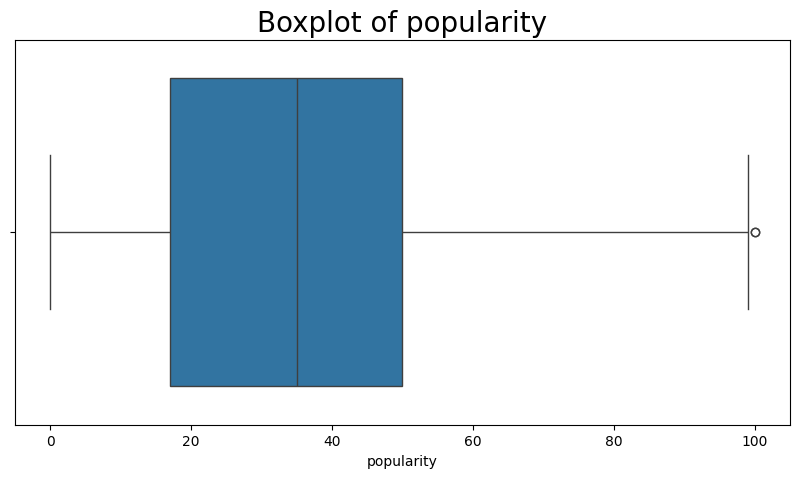

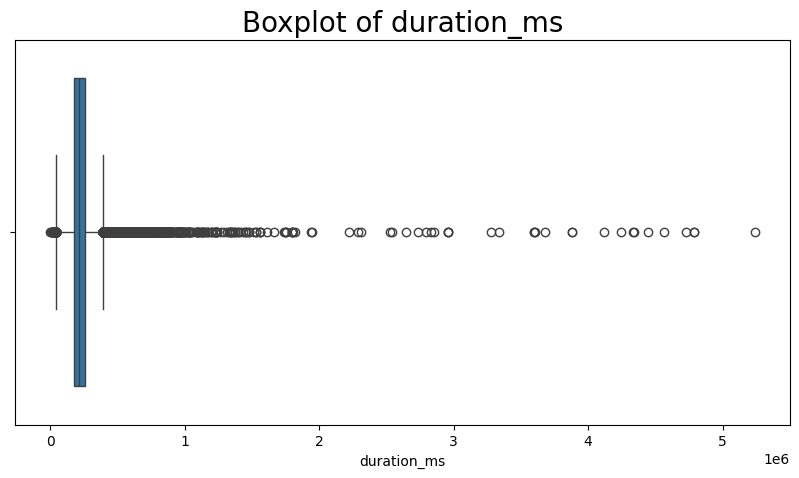

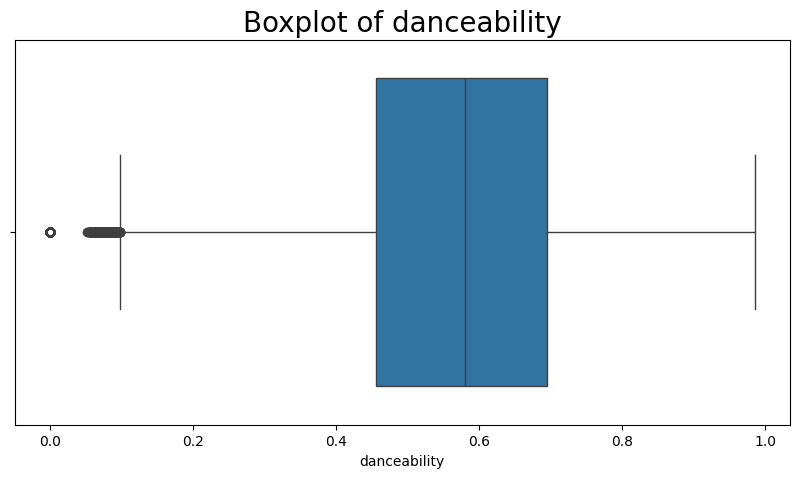

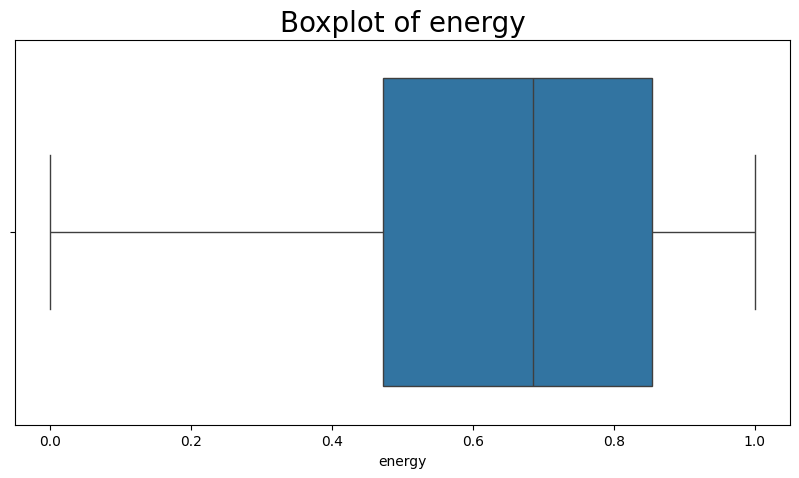

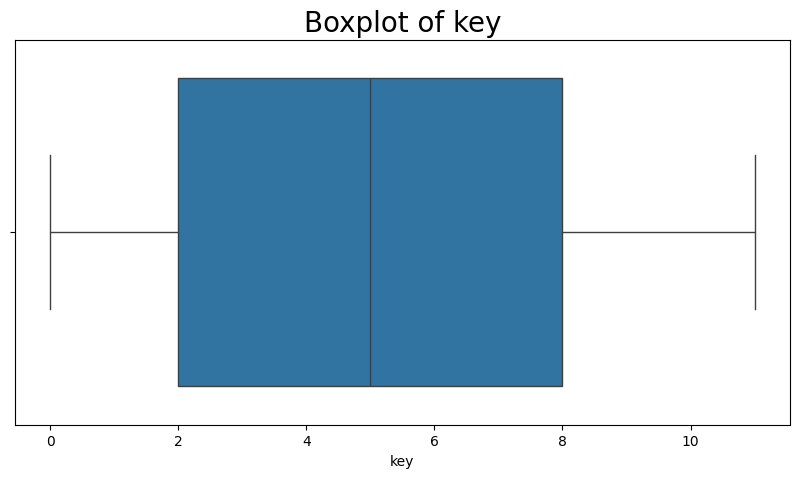

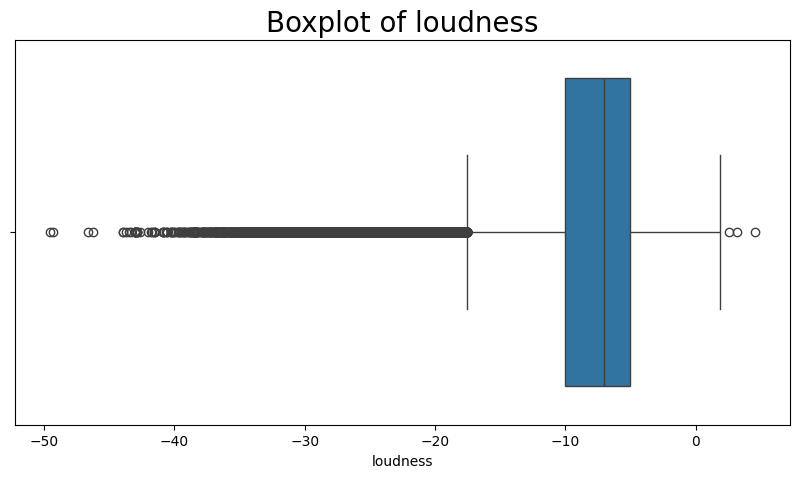

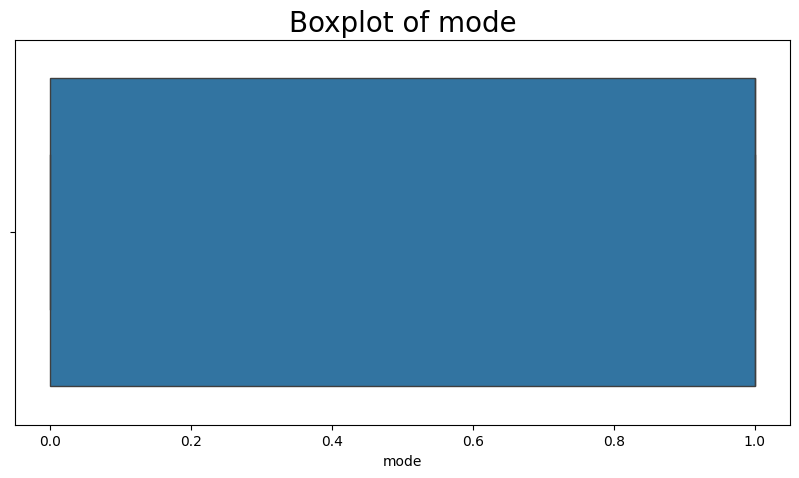

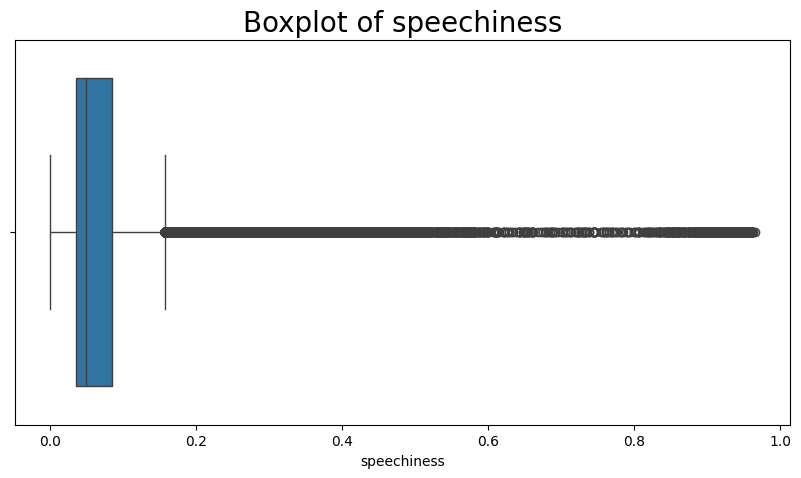

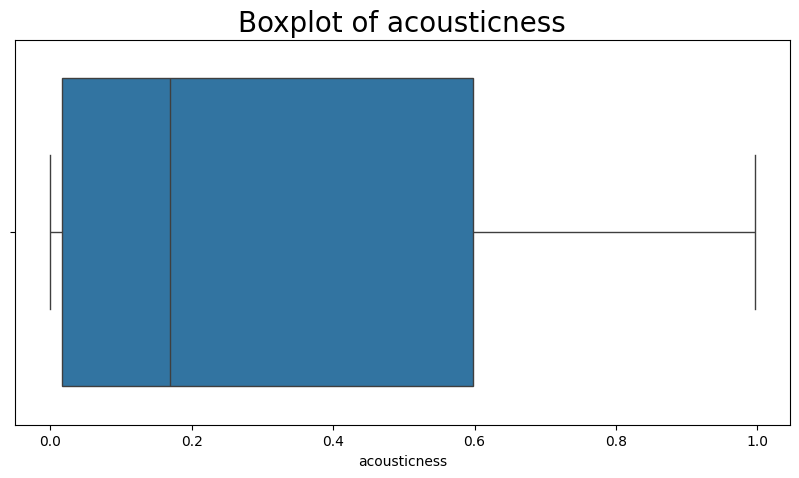

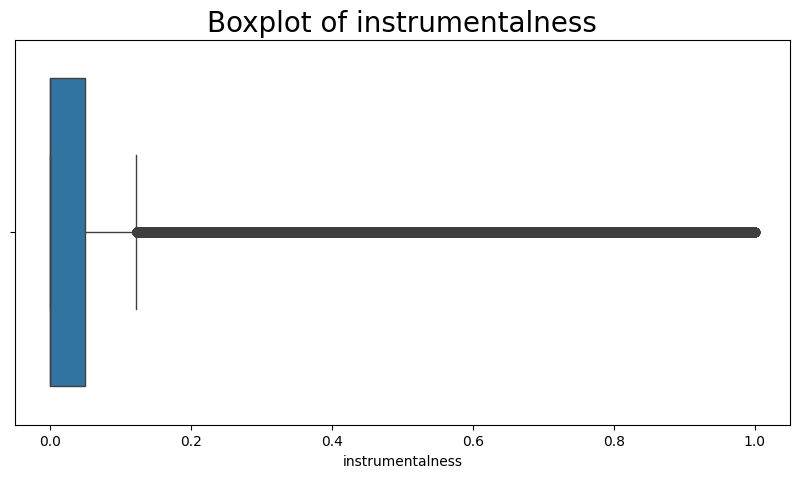

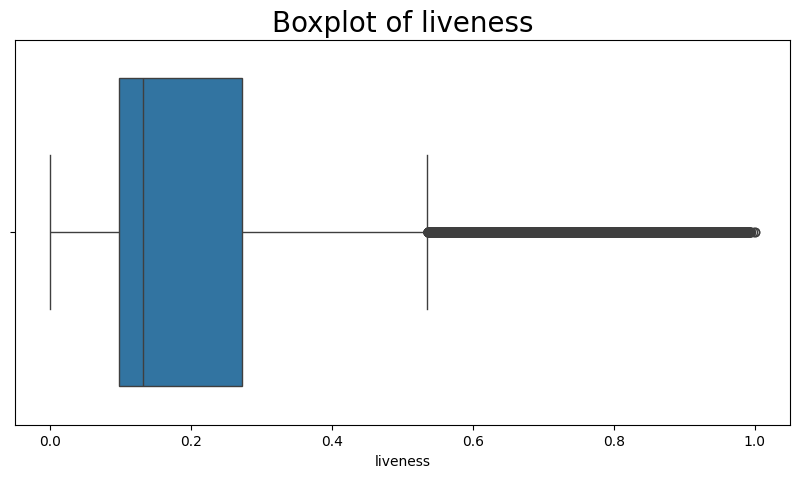

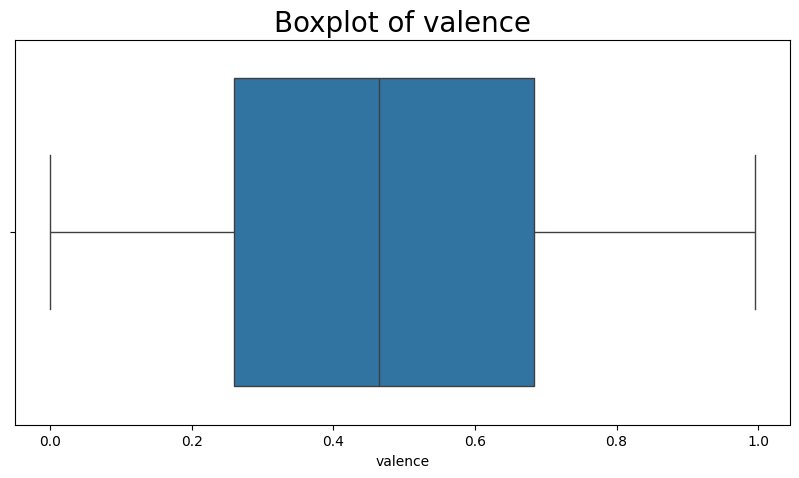

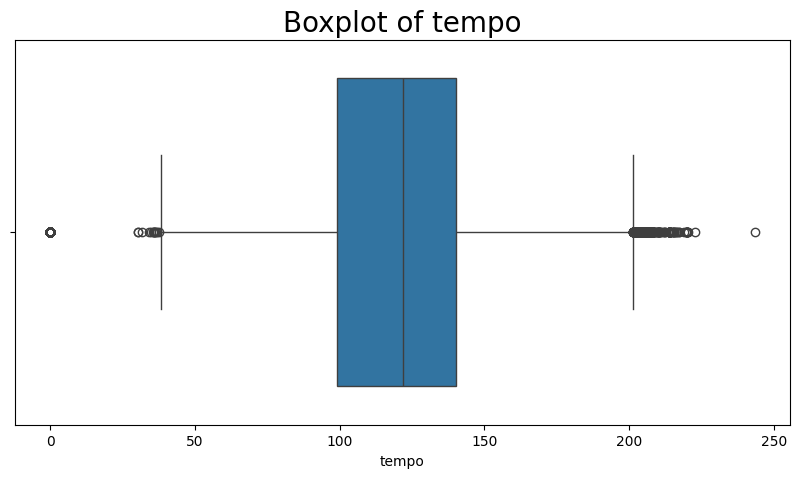

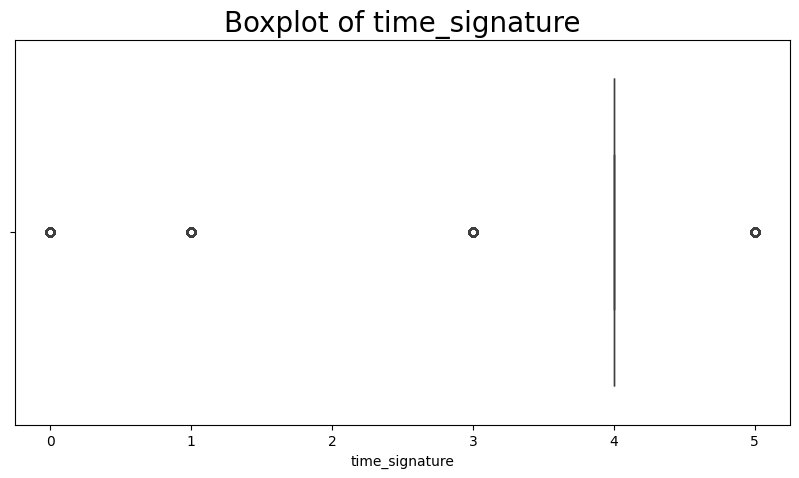

In [12]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data[col], orient='h')
    plt.title(f'Boxplot of {col}', fontsize=20)
    plt.xlabel(col)
    plt.show()

## EDA

### Numerik

In [13]:
num_cols_data = data[num_cols]
num_cols_data.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


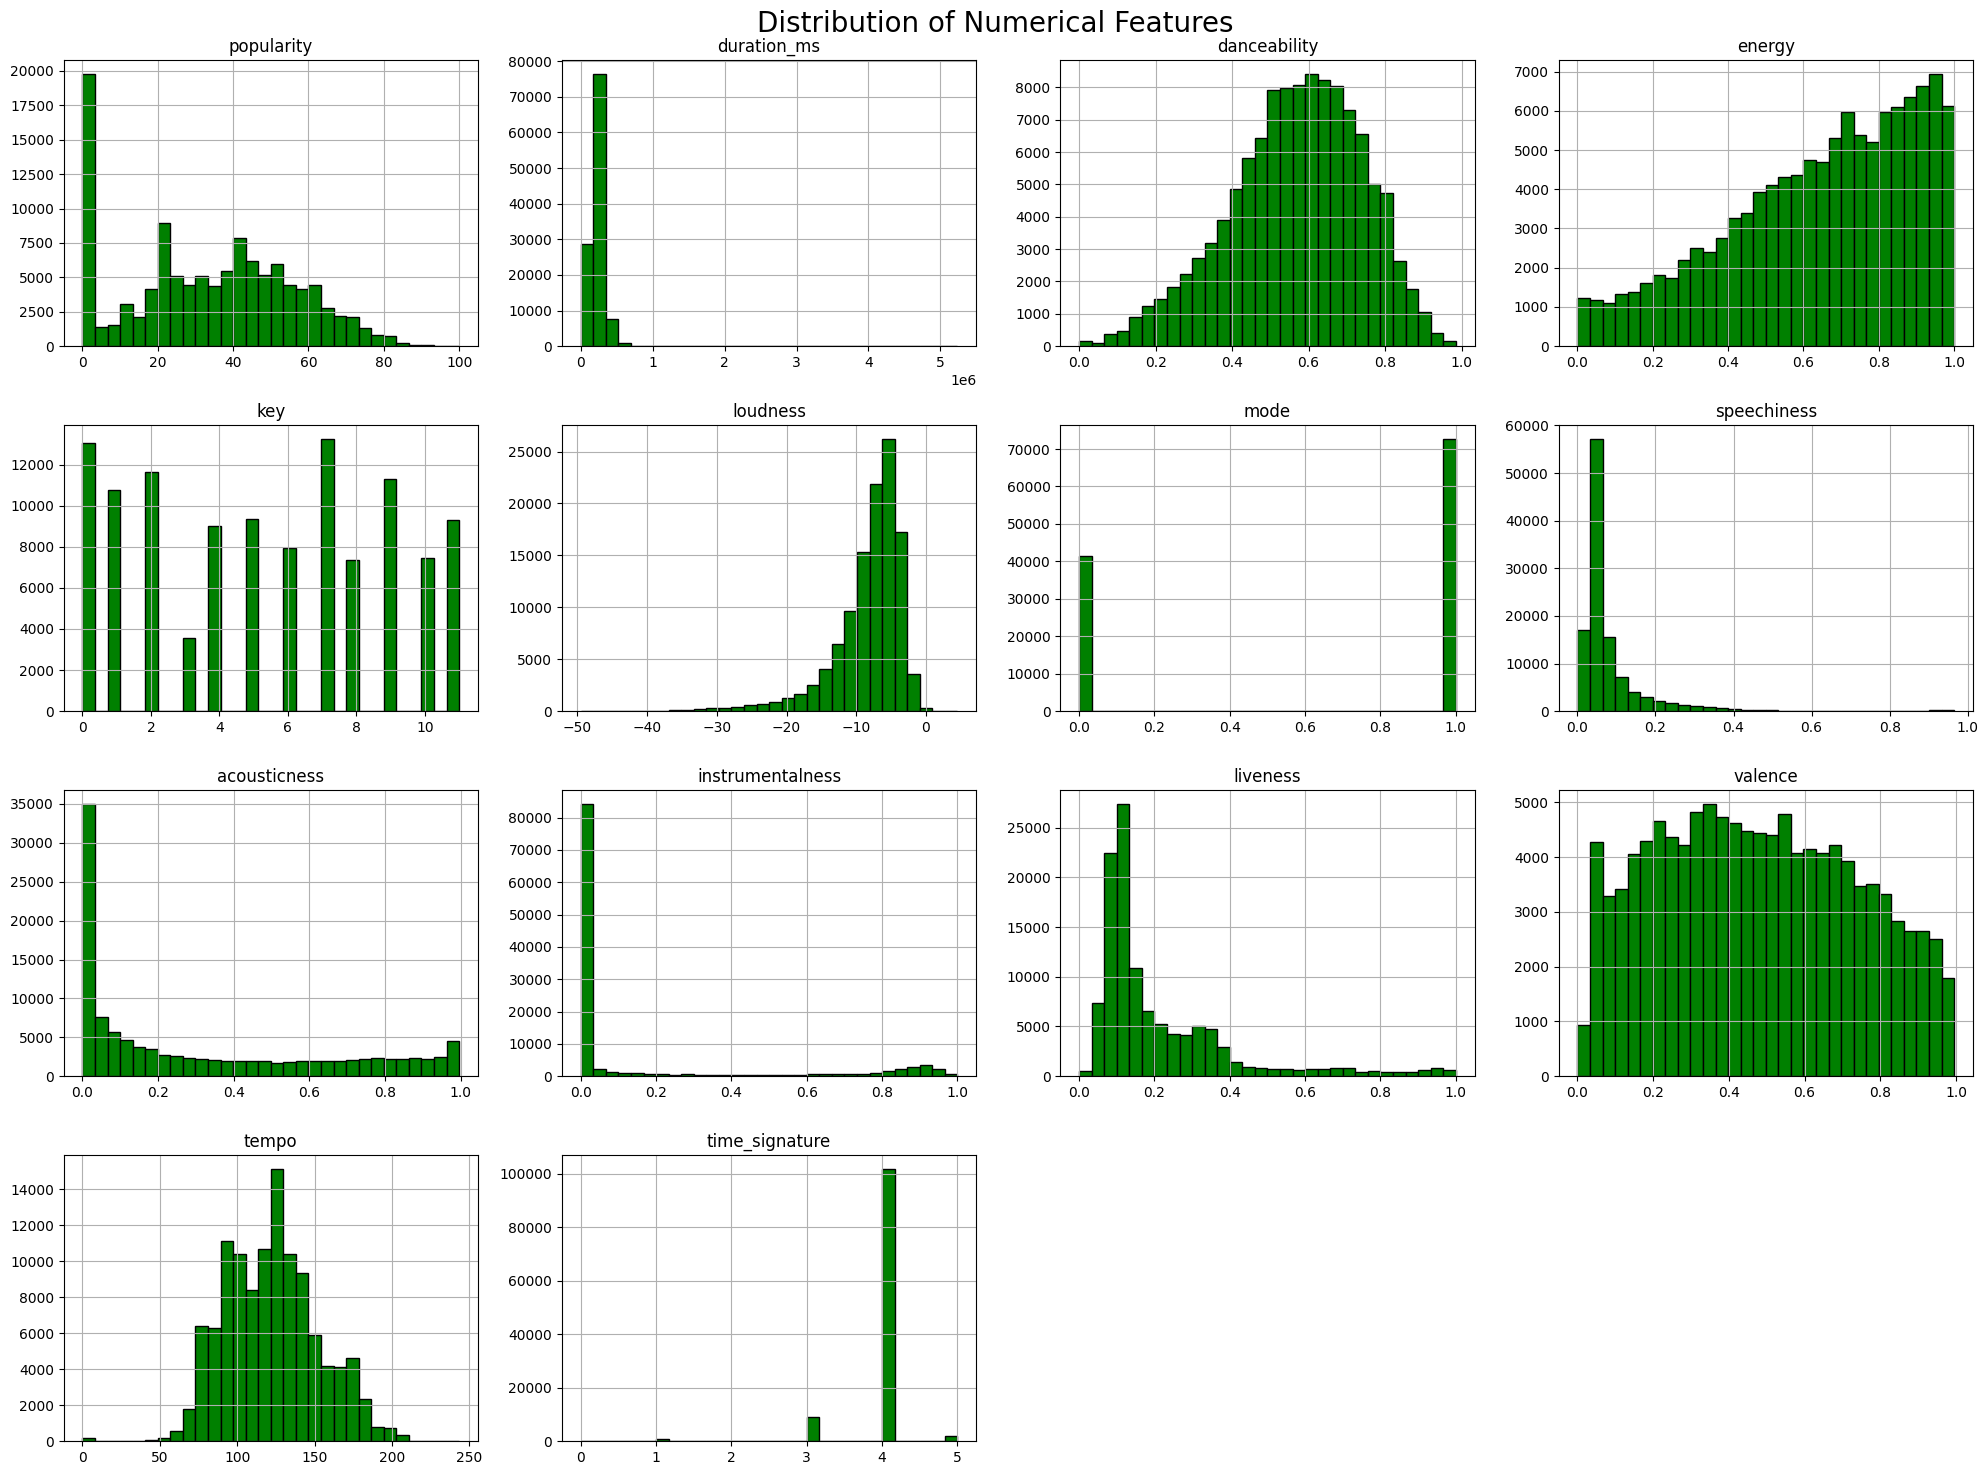

In [14]:
num_cols_data.hist(
    bins=30,
    figsize=(20, 15),
    color='green',
    edgecolor='black'
)
plt.suptitle('Distribution of Numerical Features', fontsize=20)
plt.tight_layout()
plt.show()

In [15]:
data_sorted_by_popularity = data.sort_values(by='popularity', ascending=False)
data_sorted_by_popularity.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
89411,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton
30003,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm


### Categorical

In [16]:
category_cols = data.select_dtypes(include=['object', 'bool']).columns
category_cols

Index(['track_id', 'artists', 'album_name', 'track_name', 'explicit',
       'track_genre'],
      dtype='object')

In [17]:
categoty_cols_data = data[category_cols]
categoty_cols_data.sample(5)

,track_id,artists,album_name,track_name,explicit,track_genre
69691,5jy5BC6yHRAMLT1dMEVeLc,Sujatha;S.P. Charan,Unakkaga Ellam Unakkaga,Thulli Thulli - Duet,False,malay
28480,3wfe7TOR3KtSczB4HAzSg9,DJ Noiz;Konecs;Tashay,Ofa Mai Og,Ofa Mai Og,False,dub
65959,11uSCFBn6ng3O1LZNbIIwq,Alka Yagnik;Udit Narayan,Bade Miyan Chote Miyan (Original Motion Pictur...,Kisi Disco Mein Jaaye,False,k-pop
73901,0w9iYWnmVogaGrBb2vlYVg,Thomas Schumacher,Hype/Decipher,Hype,False,minimal-techno
65337,3tP6QKbXvtrxiDI7QwKyUf,BLACKPINK,SQUARE TWO,STAY,False,k-pop


In [18]:
data['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [19]:
data.groupby('track_genre').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

,track_genre,count
0,acoustic,1000
1,afrobeat,1000
2,alt-rock,1000
3,alternative,1000
4,ambient,1000
5,anime,1000
6,black-metal,1000
7,bluegrass,1000
8,blues,1000
9,brazil,1000


In [20]:
data.groupby('track_genre').size().reset_index(name='count').sort_values(by='count', ascending=True).head(10)

,track_genre,count
0,acoustic,1000
1,afrobeat,1000
2,alt-rock,1000
3,alternative,1000
4,ambient,1000
5,anime,1000
6,black-metal,1000
7,bluegrass,1000
8,blues,1000
9,brazil,1000


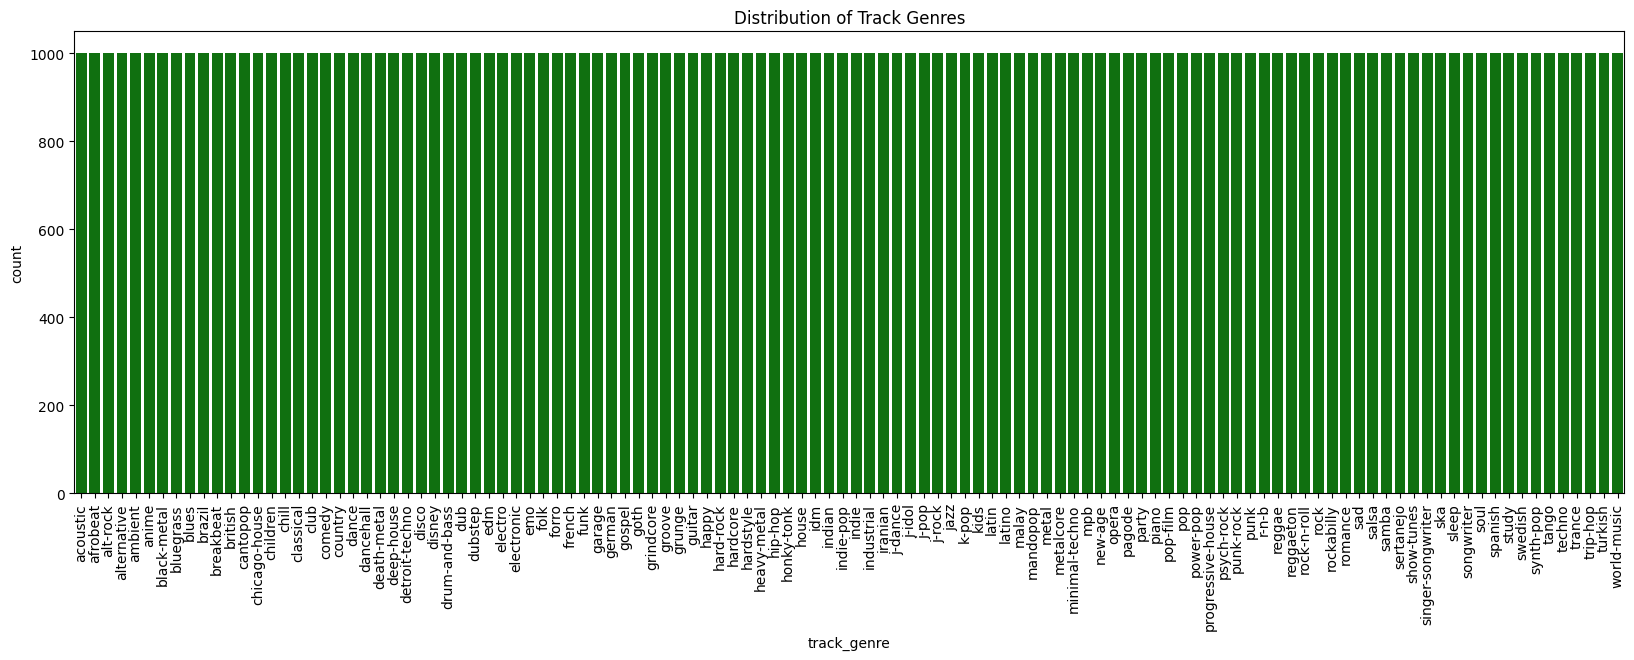

In [21]:
plt.figure(figsize=(20, 6))
plt.title('Distribution of Track Genres')
sns.countplot(data=data, x='track_genre', order=data['track_genre'].value_counts().index, color='green')
plt.xticks(rotation=90)
plt.show()

In [22]:
data['explicit'].value_counts()

explicit
False    104253
True       9747
Name: count, dtype: int64

### Bivariate

In [23]:
genre_popularity = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
genre_popularity = pd.DataFrame(genre_popularity).reset_index()
genre_popularity.head(10)

,track_genre,popularity
0,pop-film,59.283
1,k-pop,56.896
2,chill,53.651
3,sad,52.379
4,grunge,49.594
5,indian,49.539
6,anime,48.772
7,emo,48.128
8,sertanejo,47.866
9,pop,47.576


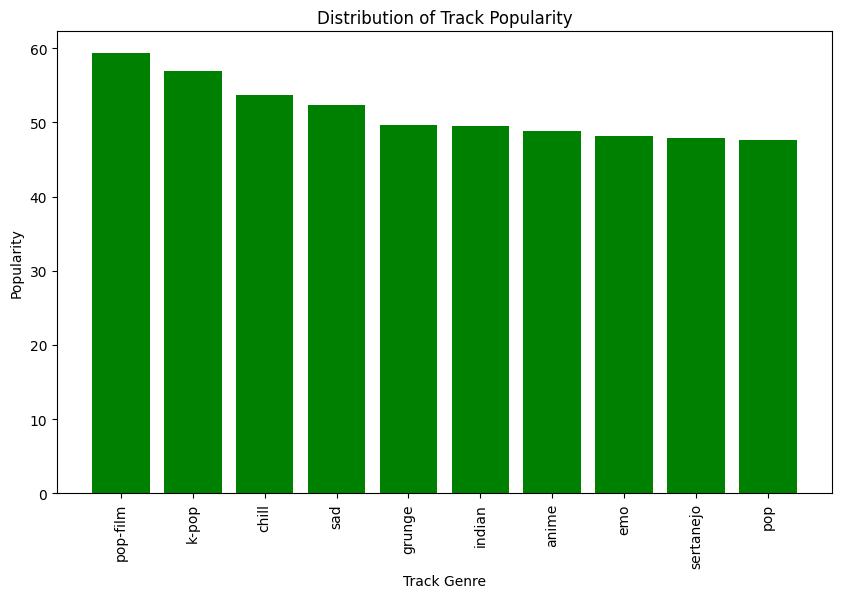

In [24]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Track Popularity')
plt.bar(genre_popularity['track_genre'].head(10), genre_popularity['popularity'].head(10), color='green')
plt.xlabel('Track Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

### Heatmap

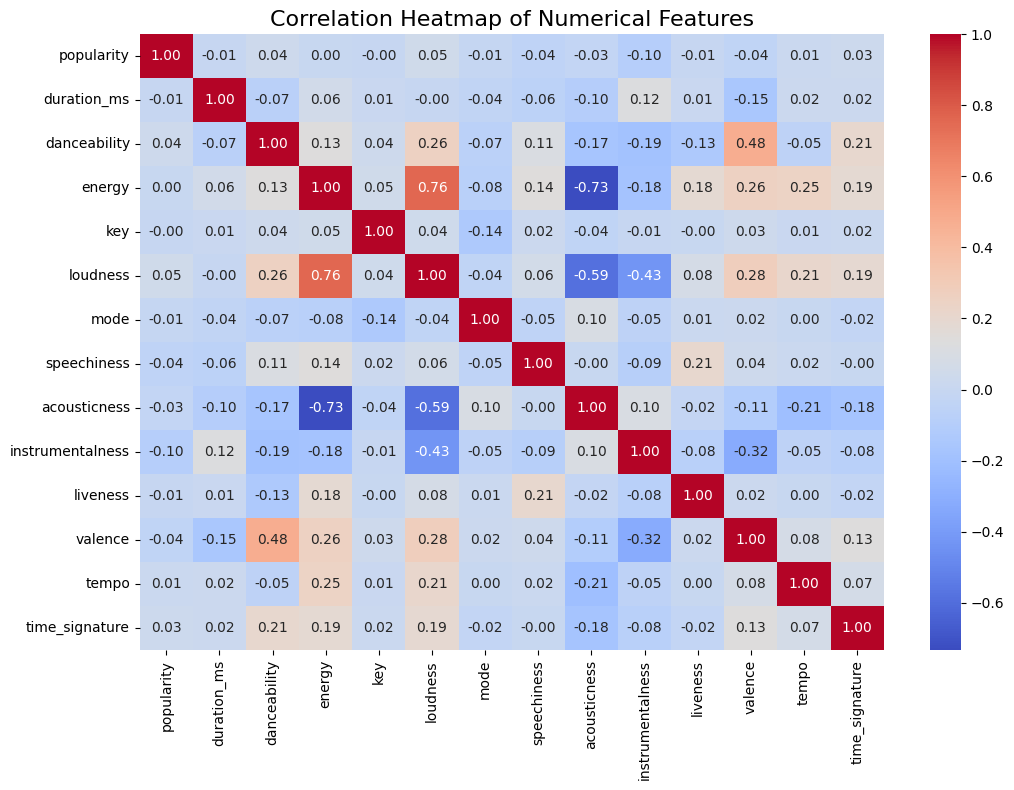

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(num_cols_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

# Data Preparation

## Data Cleaning

### Duplicate

We keep the one that more popular

In [26]:
data = data.sort_values('popularity', ascending=False)
data = data.drop_duplicates(subset=['track_id'], keep='first')
data = data.reset_index(drop=True)
data.duplicated(subset=['track_id']).sum()

np.int64(0)

In [27]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,pop
1,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
2,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,reggaeton
3,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,edm
4,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,reggae


In [28]:
data.shape

(89741, 20)

In [29]:
data = data.drop_duplicates(subset=['track_name', 'artists'], keep='first')
data = data.reset_index(drop=True)
data.duplicated(subset=['track_name', 'artists']).sum()

np.int64(0)

In [30]:
data.shape

(81344, 20)

### Missing Value

In [31]:
data = data.dropna()
data.shape

(81343, 20)

### Outlier

Terdapat anomali pada kolom durasi. Terdapat beberapa lagu dengan durasi sangat pendek dan bebrapa sangat panjang. Oleh karena itu, dilakukan pembersihan dengan menetapkan batas atas dan batasan bawah dari lagu yang akan digunakan sebagai data. 

Pada kasus ini dilakukan penetapan minimal lagu memiliki durasi waktu 45 detik (45000 ms) hingga 10 menit (600.000 ms). 

Standar ini dibuat berdasarkan karakteristik lagu yang umumnya diterima.

Pada data lain tidak dilakukan pembersihan outlier dikarenakan fitur yang dimiliki merupakan daya tarik dari lagu dan terlalu berharga apabila dihapus.

In [32]:
def convert_to_minutes(miliseconds):
    seconds = miliseconds / 1000
    minutes = seconds // 60
    seconds = seconds % 60
    return f"{int(minutes)}:{int(seconds):02d}"

In [33]:
average_duration = data['duration_ms'].mean()
print(f"Average duration of tracks: {average_duration} ms or {convert_to_minutes(average_duration)}")
min_duration = data['duration_ms'].min()
print(f"Minimum duration of tracks: {min_duration} ms or {convert_to_minutes(min_duration)}")
max_duration = data['duration_ms'].max()
print(f"Maximum duration of tracks: {max_duration} ms or {convert_to_minutes(max_duration)}")

Average duration of tracks: 231393.99990165103 ms or 3:51
Minimum duration of tracks: 8586 ms or 0:08
Maximum duration of tracks: 5237295 ms or 87:17


In [34]:
data.sort_values('duration_ms', ascending=False).head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
40548,3Cnz3Bu9Wcw8p3kiBTXTxp,Tale Of Us,Unity (Voyage Mix),Unity (Voyage Mix) Pt. 1,35,5237295,False,0.6950,0.736,5,-11.371,0,0.0374,0.00399,0.8600,0.0910,0.05090,124.001,4,minimal-techno
71868,0LBIf9EFHuxmuNig4JHGZo,Timo Maas,Crossing Wires 002 - Compiled And Mixed By Tim...,Crossing Wires 002 - Continuous DJ Mix,11,4789026,False,0.6970,0.632,1,-12.469,1,0.0451,0.00815,0.8710,0.0998,0.15100,121.055,4,breakbeat
73588,6wypxnAvmv5zYewUX3VFDd,Seth Troxler,Seth Troxler - The Lab 03,The Lab 03 - Continuous DJ Mix Part 1,8,4730302,False,0.6840,0.656,5,-11.163,0,0.0633,0.01910,0.8480,0.1030,0.30100,123.180,4,detroit-techno
67787,6JbQr97EMFD2D3Ek6gxgt1,Loco Dice,Amnesia Ibiza - Underground 10,Amnesia Ibiza Underground 10 DJ Mix,17,4563897,False,0.7830,0.728,10,-10.176,0,0.0612,0.00158,0.8400,0.1580,0.18900,125.044,4,minimal-techno
72412,3gFme8BdfTtFHxKmuTnSbj,Mark Farina,House of OM (DJ Mix),House of Om - Mark Farina - Continuous Mix,11,4447520,False,0.8610,0.805,11,-6.461,0,0.0711,0.00548,0.5770,0.1350,0.54500,129.306,4,chicago-house
71848,13hQAhg1owjTpTcI9xQc6c,Mark Farina,Live In Tokyo,Live In Tokyo - Continuous Mix,11,4339826,False,0.8060,0.582,1,-12.181,1,0.0874,0.00830,0.2370,0.3280,0.68600,128.368,4,chicago-house
71086,3se0UYprtkHthJEBuk1A5K,Mark Farina,Greenhouse Construction,Greenhouse Construction,12,4334721,False,0.8460,0.744,10,-9.260,0,0.0611,0.00371,0.3350,0.3130,0.53200,125.434,4,chicago-house
69762,6eTDnsdPlRUyrTHqFj3l7W,Lenzman;Dan Stezo,NQ State of Mind,"NQ State of Mind, Vol. 1 - Continuous DJ Mix",15,4246206,True,0.5930,0.924,1,-3.979,1,0.0899,0.00369,0.0221,0.5340,0.24200,173.938,4,drum-and-bass
35980,2QfFLpSGF1T1pY6tq4kD7Z,Ocean Sounds,Ocean Waves Sounds to Relax and Sleep,Ocean Waves Sounds,39,4120258,False,0.0797,0.995,1,-17.379,1,0.0612,0.93200,0.5620,0.3100,0.00001,84.788,3,sleep
42506,0nRYzhGf1B9Fc0riFM7KiQ,Estas Tonne,Internal Flight,Internal Flight,34,3876276,False,0.3160,0.614,4,-9.397,0,0.0406,0.93000,0.8710,0.0775,0.19000,159.791,4,guitar


In [35]:
data.sort_values('duration_ms', ascending=True).head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
80235,6hsyfegVY5yklJneM40mWi,Leila Bela,Angra Manyu,The Exorsism Begins...,0,8586,False,0.000,0.0400,8,-29.714,0,0.0000,0.928,0.9560,0.115,0.000,0.000,0,iranian
79778,38Ogh3rsHba83kXx13gbKs,Leila Bela,Angra Manyu,V-4,0,13386,False,0.000,0.2240,11,-22.196,1,0.0000,0.970,0.0000,0.907,0.000,0.000,0,iranian
79801,1HVjSh7scH1PaPiLjy2LEu,Leila Bela;Leila's Opera Class,Angra Manyu,Screams for a Finale! (feat. Leila's Opera Class),0,15800,False,0.251,0.5080,5,-10.564,0,0.3160,0.969,0.9990,0.952,0.000,184.051,3,iranian
76633,5YKCM3jbJ8lqUXUwfU7KwZ,Wolfgang Amadeus Mozart;Ingrid Haebler,Mozart: The Complete Piano Sonatas,"Andante in C Major, K. 1a",0,17453,False,0.467,0.0301,2,-28.518,0,0.0428,0.995,0.9000,0.124,0.000,84.375,4,classical
77180,1T5QvLF9lO4HO3OZQbaX9p,Robert Schumann;Pavel Nersessian,"Schumann, Poulenc & Others: Piano Works (Live ...","Carnaval, Op. 9: No. 20, Pause (Live in Japan,...",0,17826,False,0.372,0.2780,8,-16.882,1,0.0370,0.985,0.9210,0.164,0.912,89.032,1,classical
80238,3qSaeaXmtOuzkqe7DKgoiM,Leila Bela,Angra Manyu,V-7,0,21120,False,0.229,0.0577,8,-27.960,0,0.1960,0.626,0.9310,0.108,0.253,172.897,4,iranian
79979,1oVrTBrCsM2eTE1G50yxY9,Leila Bela,Angra Manyu,Shatter,0,21240,False,0.424,0.8690,9,-8.168,0,0.0728,0.707,0.0893,0.117,0.000,135.107,4,iranian
79858,1egJZfc8JBT2blFQ4clPKe,Benjamin Britten;Steven Isserlis,October Classical Playlist,"Cello Suite No. 3, Op. 87: IX. Passacaglia (Ex...",0,22266,False,0.335,0.0593,11,-26.365,0,0.0430,0.992,0.8690,0.116,0.195,77.266,5,british
77186,5viwzFJxwRE1OEUR7G6hiD,Robert Schumann;Pavel Nersessian,"Schumann, Poulenc & Others: Piano Works (Live ...","Carnaval, Op. 9: No. 13, Estrella (Live in Jap...",0,23506,False,0.379,0.2370,5,-18.265,1,0.0470,0.993,0.8870,0.144,0.477,116.093,4,classical
77911,6bg9fEHIulR3DYNYbWG0Jz,Traditional;Cappella Musicale di Santa Maria i...,Giovannini: Messa a Quattro Breve Concertata,Pax Domini,0,24000,False,0.358,0.0335,1,-28.683,1,0.0435,0.981,0.0000,0.251,0.298,95.684,3,sleep


In [36]:
upper_bound = 600000
lower_bound = 45000

# Filter the data 
data_filtered = data[(data['duration_ms'] >= lower_bound) & (data['duration_ms'] <= upper_bound)]

In [37]:
data_filtered.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000
mean,35.370519,227202.086126,0.560344,0.635836,5.288962,-8.563046,0.632238,0.088609,0.328797,0.182425,0.219257,0.464392,122.192406,3.898613
std,19.407628,83500.743643,0.176818,0.258050,3.558291,5.279393,0.482199,0.115692,0.339355,0.329993,0.197738,0.262866,30.105825,0.452030
min,0.000000,45000.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,173998.000000,0.448000,0.457000,2.000000,-10.407000,0.000000,0.036000,0.015900,0.000000,0.098500,0.243000,99.442000,4.000000
50%,35.000000,214973.000000,0.574000,0.678000,5.000000,-7.246000,1.000000,0.049100,0.189000,0.000084,0.133000,0.450000,122.041000,4.000000
75%,50.000000,266233.000000,0.690000,0.857000,8.000000,-5.131000,1.000000,0.086800,0.627000,0.140000,0.282000,0.677000,140.158000,4.000000
max,100.000000,599999.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.963000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [38]:
data = data_filtered
data.shape

(80533, 20)

In [39]:
data['explicit'] = data['explicit'].astype(int)
data['explicit'].sample(5)

7790     0
168      0
42721    0
63085    0
27893    1
Name: explicit, dtype: int64

## Normalization

In [40]:
scaler = MinMaxScaler()
data_scaled = data.copy()
# Normalize numerical columns
data_scaled[num_cols] = scaler.fit_transform(data[num_cols])
data_scaled[num_cols].describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000,80533.000000
mean,0.353705,0.328293,0.568878,0.635836,0.480815,0.757782,0.632238,0.092014,0.330118,0.182425,0.219257,0.466725,0.502081,0.779723
std,0.194076,0.150452,0.179511,0.258050,0.323481,0.097653,0.482199,0.120137,0.340718,0.329993,0.197738,0.264187,0.123703,0.090406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.210000,0.232429,0.454822,0.457000,0.181818,0.723674,0.000000,0.037383,0.015964,0.000000,0.098500,0.244221,0.408601,0.800000
50%,0.350000,0.306258,0.582741,0.678000,0.454545,0.782143,1.000000,0.050987,0.189759,0.000084,0.133000,0.452261,0.501459,0.800000
75%,0.500000,0.398619,0.700508,0.857000,0.727273,0.821264,1.000000,0.090135,0.629518,0.140000,0.282000,0.680402,0.575900,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# PCA

In [41]:
selected_cols = ['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'time_signature']

In [42]:
music_features_data = data_scaled[selected_cols]
music_features_data.sample(5)

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
24603,0,0.742132,0.798,0.636364,0.806651,1.0,0.305296,0.031627,0.000086,0.2740,0.902513,0.706799,0.8
4871,0,0.827411,0.710,0.545455,0.798661,0.0,0.048702,0.129518,0.528000,0.1130,0.574874,0.505264,0.8
14669,0,0.618274,0.415,0.636364,0.694468,1.0,0.045171,0.227912,0.067200,0.1360,0.444221,0.525829,0.8
43302,0,0.355330,0.926,0.727273,0.832418,1.0,0.102596,0.010141,0.000004,0.3520,0.619095,0.471878,0.8
11511,0,0.622335,0.508,0.636364,0.759151,1.0,0.035618,0.276104,0.000008,0.0809,0.328643,0.592122,0.8


In [43]:
from sklearn.decomposition import PCA
n_components = 0.95
pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(music_features_data)

print(f"Original feature shape: {music_features_data.shape}")
print(f"PCA feature shape: {pca_features.shape}")

Original feature shape: (80533, 13)
PCA feature shape: (80533, 9)


# Modelling

In [44]:
output_columns = ['track_id', 'track_name', 'artists', 'popularity', 'track_genre']

## Popularity Based Recommendations

In [45]:
def popularity_recommendation(input_song_name, num_recommendations=5):
    #check if the song exists in the dataset
    if input_song_name not in data['track_name'].values:
        raise ValueError(f"The song '{input_song_name}' is not in the dataset.")

    # Get the popularity of the given track
    track_popularity = data.loc[data['track_name'] == input_song_name, 'popularity'].values[0]
    
    # Get the most popular tracks
    most_popular_tracks = data[data['popularity'] >= track_popularity].sort_values(by='popularity', ascending=False)
    
    # Return the top 10 most popular tracks
    df =  most_popular_tracks[output_columns].head(num_recommendations)
    ids = df['track_id'].tolist()
    
    return df, ids

## KNN Based Recommendations

Digunakan model KNN dengan metric cosine untuk menghitung jarak antar fitur lagu antara satu dengan yang lain

In [46]:
from sklearn.neighbors import NearestNeighbors
def knn_based_recommendations(input_song_name, num_recommendations=5):
    #check if the song exists in the dataset
    if input_song_name not in data['track_name'].values:
        raise ValueError(f"The song '{input_song_name}' is not in the dataset.")
    
    knn_model = NearestNeighbors(n_neighbors=num_recommendations, metric='cosine')
    knn_model.fit(pca_features)

    # Get the index of the input song
    input_song_index = data[data['track_name'] == input_song_name].index[0]
    input_song_vector = pca_features[input_song_index].reshape(1, -1)
    
    distances, indices = knn_model.kneighbors(input_song_vector, n_neighbors=num_recommendations + 10)
    similar_song_indices = indices[0][1:]  # Exclude the first index (the song itself)
    
    knn_based_recommendations = data.iloc[similar_song_indices][output_columns]
    knn_based_recommendations['distance'] = distances[0][1:]  # Exclude the first distance (the song itself)

    # Delete duplicate songs
    knn_based_recommendations.drop_duplicates(subset=['track_name'])
    knn_based_recommendations.sort_values(by='distance', ascending=True)

    df = knn_based_recommendations.head(num_recommendations)
    ids = df['track_id'].tolist()
    
    return df, ids

## Cluster Based Recommendation

In [47]:
from sklearn.cluster import KMeans

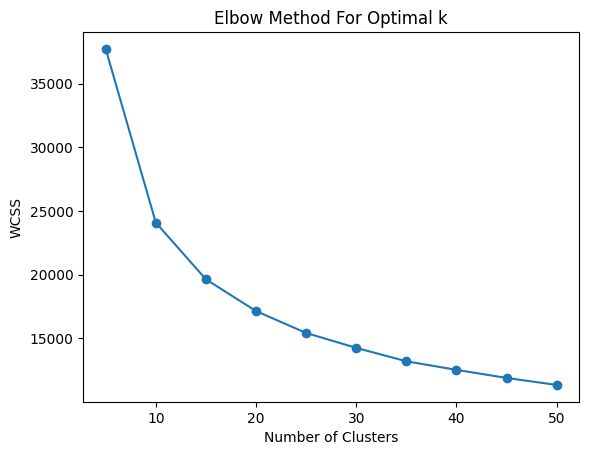

In [48]:
wcss = []
for k in range(5, 51, 5):  # Try from 5 to 50 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(pca_features) 
    wcss.append(kmeans.inertia_)

plt.plot(range(5, 51, 5), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Dari grafik, diasumsikan nilai n_cluster paling optimal yaitu 10. 

In [49]:
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(pca_features)
data['cluster'] = clusters
data[['track_name', 'artists', 'cluster']].sample(5)

,track_name,artists,cluster
61737,like to thank my buddies,Combichrist,7
41791,Bailando,Yaksta;Dj Syke45,3
29004,This Is Revenge,Hiroaki Tsutsumi,8
79114,Little Drummer Boy,Scott Hamilton,2
74245,Negro Muzic,Glenn Underground,3


In [50]:
data['cluster'].value_counts()

cluster
3    14122
4    11868
6    11551
8    10531
1    10347
5     5896
0     5250
2     4066
9     4059
7     2843
Name: count, dtype: int64

In [51]:
data[data['cluster'] == 0].track_genre.value_counts().head(10)

track_genre
minimal-techno    367
detroit-techno    353
grindcore         311
idm               244
trance            233
black-metal       230
club              228
breakbeat         227
chicago-house     226
drum-and-bass     218
Name: count, dtype: int64

In [52]:
def cluster_based_recommendations(input_song_name, num_recommendations=5):
    # Get the cluster of the given track
    track_cluster = data.loc[data['track_name'] == input_song_name, 'cluster'].values[0]

    cluster_tracks = data[data['cluster'] == track_cluster].sort_values(by='popularity', ascending=False)
    cluster_tracks = cluster_tracks[cluster_tracks['track_name'] != input_song_name]
    df = cluster_tracks[output_columns].head(num_recommendations)
    ids = df['track_id'].tolist()

    return df, ids


## Hybrid Recommendation

In [60]:
def hybrid_recommendation(input_song_name, num_recommendations=5):
    # Check if the song exists in the dataset
    if input_song_name not in data['track_name'].values:
        raise ValueError(f"The song '{input_song_name}' is not in the dataset.")
    
    # KNN model for similarity
    knn_model = NearestNeighbors(n_neighbors=num_recommendations, metric='cosine')
    knn_model.fit(pca_features)

    # Get the index of the input song
    input_song_index = data[data['track_name'] == input_song_name].index[0]
    input_song_vector = pca_features[input_song_index].reshape(1, -1)
    
    distances, indices = knn_model.kneighbors(input_song_vector, n_neighbors=num_recommendations + 10)
    similar_song_indices = indices[0][1:]  # Exclude the first index (the song itself)
    
    knn_based_recommendations = data.iloc[similar_song_indices].copy()
    knn_based_recommendations['distance'] = distances[0][1:]  # Exclude the first distance (the song itself)

    # Filter based on input song cluster
    input_song_cluster = data.loc[input_song_index, 'cluster']
    candidate_songs = knn_based_recommendations[knn_based_recommendations['cluster'] == input_song_cluster]

    # Sort by popularity and similarity (hybrid ranking)
    candidate_songs['hybrid_score'] = 0.6 * candidate_songs['distance'] + 0.4 * (candidate_songs['popularity'] / 100)
    candidate_songs.sort_values(by='hybrid_score', ascending=False)
    df = candidate_songs[output_columns].head(num_recommendations)
    ids = df['track_id'].tolist()
    
    return df, ids

## Hasil Rekomendasi

In [64]:
input_song_name = 'Blinding Lights'
song = data.loc[data['track_name'] == input_song_name]
song = song[0:1]
song

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
26,0VjIjW4GlUZAMYd2vXMi3b,The Weeknd,After Hours,Blinding Lights,91,200040,0,0.514,0.73,1,...,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,pop,4


In [55]:
input_song_id = song['track_id'].iloc[0]
input_song_id

'0VjIjW4GlUZAMYd2vXMi3b'

In [56]:
pop_pred, pop_ids = popularity_recommendation(input_song_name, num_recommendations=5)
pop_pred

,track_id,track_name,artists,popularity,track_genre
0,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100,pop
1,2tTmW7RDtMQtBk7m2rYeSw,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,99,hip-hop
2,5ww2BF9slyYgNOk37BlC4u,La Bachata,Manuel Turizo,98,reggaeton
3,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),David Guetta;Bebe Rexha,98,edm
4,6Sq7ltF9Qa7SNFBsV5Cogx,Me Porto Bonito,Bad Bunny;Chencho Corleone,97,reggae


In [57]:
knn_pred, knn_ids = knn_based_recommendations(input_song_name, num_recommendations=5)
knn_pred

,track_id,track_name,artists,popularity,track_genre,distance
16879,679TnTjA1ad756mFFq91ZK,Thinkin About,ShockOne;Lee Mvtthews,52,j-dance,0.003484
13826,7ocUMTh2XF8JECuVErcXwI,Damage Each Other,Steve Brian;Danni Baylor,55,trance,0.003690
71301,43ieiHbrsuEsUu8TdhTHJm,Noise (feat. Donnis) - Rise At Night Remix,Bassnectar;Donnis;Rise At Night,12,breakbeat,0.003786
1380,46lFttIf5hnUZMGvjK0Wxo,Runaway (U & I),Galantis,75,edm,0.003888
25309,59OTmT50LsfZVqExj9nCHL,Sight Of Your Soul,Dirtyphonics;Sullivan King,46,drum-and-bass,0.004180


In [58]:
cluster_pred, cluster_ids = cluster_based_recommendations(input_song_name, num_recommendations=5)
cluster_pred

,track_id,track_name,artists,popularity,track_genre
0,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100,pop
1,2tTmW7RDtMQtBk7m2rYeSw,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,99,hip-hop
7,4h9wh7iOZ0GGn8QVp4RAOB,I Ain't Worried,OneRepublic,96,piano
40,2eAvDnpXP5W0cVtiI0PUxV,Dandelions,Ruth B.,90,pop
51,6UelLqGlWMcVH1E5c4H7lY,Watermelon Sugar,Harry Styles,89,pop


In [61]:
hybrid_pred, hybrid_ids = hybrid_recommendation(input_song_name, num_recommendations=5)
hybrid_pred

,track_id,track_name,artists,popularity,track_genre
16879,679TnTjA1ad756mFFq91ZK,Thinkin About,ShockOne;Lee Mvtthews,52,j-dance
13826,7ocUMTh2XF8JECuVErcXwI,Damage Each Other,Steve Brian;Danni Baylor,55,trance
71301,43ieiHbrsuEsUu8TdhTHJm,Noise (feat. Donnis) - Rise At Night Remix,Bassnectar;Donnis;Rise At Night,12,breakbeat
1380,46lFttIf5hnUZMGvjK0Wxo,Runaway (U & I),Galantis,75,edm
25309,59OTmT50LsfZVqExj9nCHL,Sight Of Your Soul,Dirtyphonics;Sullivan King,46,drum-and-bass


# Evaluation

### define ground truth by genre

In [65]:
def get_ground_truth_by_genre(df, input_track_id):
    genre = df[df['track_id'] == input_track_id]['track_genre'].values[0]
    df = df[df['track_genre'] == genre][output_columns]
    ids = df['track_id'].tolist()
    return df, ids

In [66]:
genre_truth, genre_truth_ids = get_ground_truth_by_genre(data, input_song_id)
genre_truth

,track_id,track_name,artists,popularity,track_genre
0,3nqQXoyQOWXiESFLlDF1hG,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100,pop
9,4LRPiXqCikLlN15c3yImP7,As It Was,Harry Styles,95,pop
11,6xGruZOHLs39ZbVccQTuPZ,Glimpse of Us,Joji,94,pop
13,2QjOHCTQ1Jl3zawyYOpxh6,Sweater Weather,The Neighbourhood,93,pop
14,3JvKfv6T31zO0ini8iNItO,Another Love,Tom Odell,93,pop
...,...,...,...,...,...
81177,1qJ4p0TK46dVxY4nEHDGTb,24K Magic - R3hab Remix,Bruno Mars;R3HAB,0,pop
81178,6fBMKVPDNNdnKzaW4Hvu2M,Everyday Life,Coldplay,0,pop
81179,0Cr69H8rDTrwIkJV27sUYj,Higher Power,Coldplay,0,pop
81180,67l8nACchnc7Mq9LP6XqNz,"River - Recorded At RAK Studios, London",Sam Smith,0,pop


## Scoring

In [67]:
from sklearn.metrics import ndcg_score

In [68]:
def precision_at_k(y_true, y_pred, k):
    y_pred = y_pred[:k]
    relevant = set(y_true)
    return len([i for i in y_pred if i in relevant]) / k

def recall_at_k(y_true, y_pred, k):
    y_pred = y_pred[:k]
    relevant = set(y_true)
    return len([i for i in y_pred if i in relevant]) / len(relevant) if relevant else 0

def f1_score_at_k(precision, recall):
    return 2 * precision * recall / (precision + recall) if (precision + recall) else 0

def average_precision(y_true, y_pred, k):
    score = 0.0
    hits = 0.0
    for i, p in enumerate(y_pred[:k]):
        if p in y_true:
            hits += 1
            score += hits / (i + 1)
    return score / min(len(y_true), k) if y_true else 0

def evaluate_all(y_true, y_pred, k=5):
    p = precision_at_k(y_true, y_pred, k)
    r = recall_at_k(y_true, y_pred, k)
    f1 = f1_score_at_k(p, r)
    ap = average_precision(y_true, y_pred, k)

    # NDCG assumes relevance scores → binary (1 if relevant)
    true_relevance = [[1 if i in y_true else 0 for i in y_pred[:k]]]
    predicted_scores = [[1.0 / (i + 1) for i in range(k)]]
    ndcg = ndcg_score(true_relevance, predicted_scores)

    return {
        'Precision@{}'.format(k): round(p, 4),
        'Recall@{}'.format(k): round(r, 4),
        'F1@{}'.format(k): round(f1, 4),
        'MAP@{}'.format(k): round(ap, 4),
        'NDCG@{}'.format(k): round(ndcg, 4)
    }

In [69]:
results = []
results.append({'Model': 'Popularity', **evaluate_all(genre_truth_ids, pop_ids)})
results.append({'Model': 'KNN', **evaluate_all(genre_truth_ids, knn_ids)})
results.append({'Model': 'Clustering', **evaluate_all(genre_truth_ids, cluster_ids)})
results.append({'Model': 'Hybrid', **evaluate_all(genre_truth_ids, hybrid_ids)})

In [70]:
eval_df = pd.DataFrame(results)
eval_df

,Model,Precision@5,Recall@5,F1@5,MAP@5,NDCG@5
0,Popularity,0.2,0.0021,0.0042,0.20,1.0000
1,KNN,0.0,0.0000,0.0000,0.00,0.0000
2,Clustering,0.6,0.0064,0.0126,0.42,0.8529
3,Hybrid,0.0,0.0000,0.0000,0.00,0.0000


Dari hasil evaluasi yang paling baik merupakan model yang berbasis cluster